In [44]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
test= pd.read_csv("test.csv")

In [46]:
train=pd.read_csv("train.csv")

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [51]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
%matplotlib inline

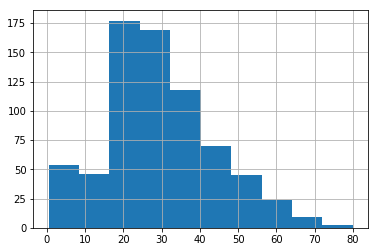

In [53]:
train.Age.hist()

In [54]:
train[['Survived', 'Pclass']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [55]:
train[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [56]:
a=train[["Survived","SibSp"]].groupby("SibSp").mean().sort_values(by='Survived', ascending=False)

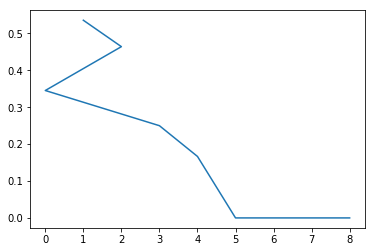

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [60]:
plt.plot(a.index,a['Survived'])
plt.show()
a

In [61]:
train['famsize']=train['Parch']+train['SibSp']
test['famsize']=test['Parch']+test['SibSp']
a=train[["Survived","famsize"]].groupby("famsize").mean().sort_values('Survived', ascending=False)
a

,Survived
famsize,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


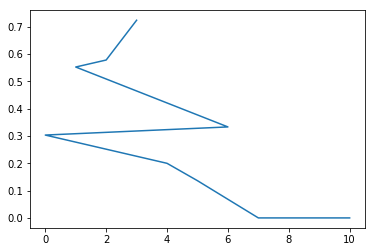

In [62]:
plt.plot(a.index,a['Survived'])
plt.show()

In [63]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'famsize'], dtype=object)

In [64]:
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train['Sex']

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int32

In [65]:
a=train.groupby(['Pclass','SibSp']).mean()

In [66]:
a

PassengerId  Survived       Sex        Age     Parch  \
Pclass SibSp                                                         
1      0       462.802920  0.562044  0.357664  39.181416  0.270073   
       1       469.126761  0.746479  0.563380  37.414154  0.422535   
       2       506.800000  0.800000  0.600000  37.200000  0.800000   
       3       153.000000  0.666667  0.666667  22.000000  2.000000   
2      0       434.350000  0.416667  0.366667  31.934220  0.200000   
       1       461.672727  0.581818  0.509091  27.363636  0.709091   
       2       476.875000  0.500000  0.375000  19.125000  0.875000   
       3       727.000000  1.000000  1.000000  30.000000  0.000000   
3      0       459.655271  0.236467  0.230769  27.630201  0.148148   
       1       400.036145  0.325301  0.457831  24.912698  0.819277   
       2       346.600000  0.333333  0.466667  18.875000  0.466667   
       3       329.916667  0.083333  0.666667   8.875000  1.250000   
       4       381.611111  0.166667  0.333333   7.055556  1.500000   
       5       336.800000  0.000000  0.200000  10.200000  2.000000   
       8       481.714286  0.000000  0.428571        NaN  2.000000   

                    Fare    famsize  
Pclass SibSp                         
1      0       75.223356   0.270073  
       1       88.492021   1.422535  
       2      159.975840   2.800000  
       3      263.000000   5.000000  
2      0       15.532327   0.200000  
       1       28.385682   1.709091  
       2       44.468750   2.875000  
       3       21.000000   3.000000  
3      0        9.832689   0.148148  
       1       16.658487   1.819277  
       2       19.564993   2.466667  
       3       24.378483   4.250000  
       4       31.855556   5.500000  
       5       46.900000   7.000000  
       8       69.550000  10.000000

In [67]:
a['Age']

Pclass  SibSp
1       0        39.181416
        1        37.414154
        2        37.200000
        3        22.000000
2       0        31.934220
        1        27.363636
        2        19.125000
        3        30.000000
3       0        27.630201
        1        24.912698
        2        18.875000
        3         8.875000
        4         7.055556
        5        10.200000
        8              NaN
Name: Age, dtype: float64

In [68]:
# Imputation in train data set (Age)

In [69]:
train_grouped=train.groupby(['Pclass','SibSp'])

In [71]:
train_imputed = train_grouped.transform(lambda grp: grp.fillna(grp.median()))

In [75]:
train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Sex            891 non-null int32
Age            884 non-null float64
Parch          891 non-null int64
Fare           891 non-null float64
famsize        891 non-null int64
Pclass         891 non-null int64
SibSp          891 non-null int64
dtypes: float64(2), int32(1), int64(6)
memory usage: 59.2 KB


In [76]:
train_imputed[['Pclass','SibSp','Survived','Parch','Fare','famsize','PassengerId','Sex']]=train[['Pclass','SibSp','Survived','Parch','Fare','famsize','PassengerId','Sex']]

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
famsize        891 non-null int64
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 87.1+ KB


In [77]:
train_imputed['Embarked'] = train_grouped['Embarked'].apply(lambda grp: grp.fillna(grp.mode()))

In [78]:
train_imputed

,PassengerId,Survived,Sex,Age,Parch,Fare,famsize,Pclass,SibSp,Embarked
0,1,0,0,22.0,0,7.2500,1,3,1,S
1,2,1,1,38.0,0,71.2833,1,1,1,C
2,3,1,1,26.0,0,7.9250,0,3,0,S
3,4,1,1,35.0,0,53.1000,1,1,1,S
4,5,0,0,35.0,0,8.0500,0,3,0,S
5,6,0,0,26.0,0,8.4583,0,3,0,Q
6,7,0,0,54.0,0,51.8625,0,1,0,S
7,8,0,0,2.0,1,21.0750,4,3,3,S
8,9,1,1,27.0,2,11.1333,2,3,0,S
9,10,1,1,14.0,0,30.0708,1,2,1,C


In [85]:
train_imputed.dropna(inplace=True)


In [87]:
train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    882 non-null int64
Survived       882 non-null int64
Sex            882 non-null int32
Age            882 non-null float64
Parch          882 non-null int64
Fare           882 non-null float64
famsize        882 non-null int64
Pclass         882 non-null int64
SibSp          882 non-null int64
Embarked       882 non-null object
dtypes: float64(2), int32(1), int64(6), object(1)
memory usage: 72.4+ KB


In [89]:
train_imputed.head()

,PassengerId,Survived,Sex,Age,Parch,Fare,famsize,Pclass,SibSp,Embarked
0,1,0,0,22.0,0,7.2500,1,3,1,S
1,2,1,1,38.0,0,71.2833,1,1,1,C
2,3,1,1,26.0,0,7.9250,0,3,0,S
3,4,1,1,35.0,0,53.1000,1,1,1,S
4,5,0,0,35.0,0,8.0500,0,3,0,S


In [90]:
train_imputed.index=train_imputed['PassengerId']

In [92]:
train_imputed.drop('PassengerId',axis=1,inplace=True)

In [94]:
train_imputed.head()

,Survived,Sex,Age,Parch,Fare,famsize,Pclass,SibSp,Embarked
PassengerId,,,,,,,,,
1,0,0,22.0,0,7.2500,1,3,1,S
2,1,1,38.0,0,71.2833,1,1,1,C
3,1,1,26.0,0,7.9250,0,3,0,S
4,1,1,35.0,0,53.1000,1,1,1,S
5,0,0,35.0,0,8.0500,0,3,0,S


In [95]:
train_imputed.columns.values

array(['Survived', 'Sex', 'Age', 'Parch', 'Fare', 'famsize', 'Pclass',
       'SibSp', 'Embarked'], dtype=object)

In [96]:
# Imputation in test data-set

In [97]:
test_grouped=test.groupby(['Pclass','SibSp'])
test_imputed= test_grouped.transform(lambda grp: grp.fillna(grp.median()))
test_imputed['Embarked'] = test_grouped['Embarked'].apply(lambda grp: grp.fillna(grp.mode()))
test_imputed[['Pclass','Sex','Embarked','famsize','SibSp']]=test[['Pclass','Sex','Embarked','famsize','SibSp']]
test_imputed.index=test_imputed['PassengerId']
test_imputed.drop('PassengerId',axis=1,inplace=True)

In [99]:
train_imputed.columns.values, test_imputed.columns.values

(array(['Survived', 'Sex', 'Age', 'Parch', 'Fare', 'famsize', 'Pclass',
        'SibSp', 'Embarked'], dtype=object),
 array(['Sex', 'Age', 'Parch', 'Fare', 'famsize', 'Embarked', 'Pclass',
        'SibSp'], dtype=object))

In [100]:
train_imputed.drop(['Parch','SibSp'],axis=1,inplace= True)
test_imputed.drop(['Parch','SibSp'],axis=1,inplace=True)
train_imputed.columns.values

array(['Survived', 'Sex', 'Age', 'Fare', 'famsize', 'Pclass', 'Embarked'], dtype=object)

In [101]:
train_imputed.shape, test_imputed.shape

((882, 7), (418, 6))

In [102]:
a=train_imputed['Embarked'].isnull()

In [106]:
np.unique(test_imputed['Embarked'])

array(['C', 'Q', 'S'], dtype=object)

In [114]:
train.drop([62,830],inplace=True)

In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null int32
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          203 non-null object
Embarked       887 non-null object
famsize        889 non-null int64
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 93.8+ KB


In [118]:
emb=pd.get_dummies(train_imputed['Embarked'],columns='Embarked',prefix='Embarked')
emb

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,1,0
7,0,0,1
8,0,0,1
9,0,0,1


In [119]:
emb_test=pd.get_dummies(test_imputed['Embarked'],columns='Embarked',prefix='Embarked')

In [120]:
emb_test.head()

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
892,0,1,0
893,0,0,1
894,0,1,0
895,0,0,1
896,0,0,1


In [121]:
train_imputed=pd.concat([train_imputed, emb], axis=1)
train_imputed.drop(['Embarked'],axis=1,inplace= True)

In [122]:
train_imputed.head()

,Survived,Sex,Age,Fare,famsize,Pclass,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,0,22.0,7.2500,1,3,0,0,1
2,1,1,38.0,71.2833,1,1,1,0,0
3,1,1,26.0,7.9250,0,3,0,0,1
4,1,1,35.0,53.1000,1,1,0,0,1
5,0,0,35.0,8.0500,0,3,0,0,1


In [123]:
test_imputed=pd.concat([test_imputed, emb_test], axis=1)
test_imputed.drop(['Embarked'],axis=1,inplace= True)

In [124]:
test_imputed.head()

,Sex,Age,Fare,famsize,Pclass,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,0,34.5,7.8292,0,3,0,1,0
893,1,47.0,7.0000,1,3,0,0,1
894,0,62.0,9.6875,0,2,0,1,0
895,0,27.0,8.6625,0,3,0,0,1
896,1,22.0,12.2875,2,3,0,0,1


In [127]:
X=train_imputed.as_matrix(['Pclass','Sex','Age','Fare','Embarked_C','Embarked_S','Embarked_Q','famsize'])
y=train_imputed['Survived']

In [131]:
test_x=test_imputed.as_matrix(['Pclass','Sex','Age','Fare','Embarked_C','Embarked_Q','Embarked_S','famsize'])

In [132]:
test_x

array([[  3. ,   0. ,  34.5, ...,   1. ,   0. ,   0. ],
       [  3. ,   1. ,  47. , ...,   0. ,   1. ,   1. ],
       [  2. ,   0. ,  62. , ...,   1. ,   0. ,   0. ],
       ..., 
       [  3. ,   0. ,  38.5, ...,   0. ,   1. ,   0. ],
       [  3. ,   0. ,  24. , ...,   0. ,   1. ,   0. ],
       [  3. ,   0. ,  20. , ...,   0. ,   0. ,   2. ]])

In [135]:
sc = StandardScaler()
mat1 = sc.fit_transform(X)
#mat2 = sc.fit_transform(y)
mat3 = sc.fit_transform(test_x)
#df = pd.DataFrame(mat, columns=cols)

In [138]:
mat3

array([[ 0.87348191, -0.75592895,  0.40984345, ...,  2.84375747,
        -1.35067551, -0.5534426 ],
       [ 0.87348191,  1.32287566,  1.36948138, ..., -0.35164743,
         0.74037028,  0.10564289],
       [-0.31581919, -0.75592895,  2.5210469 , ...,  2.84375747,
        -1.35067551, -0.5534426 ],
       ..., 
       [ 0.87348191, -0.75592895,  0.71692759, ..., -0.35164743,
         0.74037028, -0.5534426 ],
       [ 0.87348191, -0.75592895, -0.39625241, ..., -0.35164743,
         0.74037028, -0.5534426 ],
       [ 0.87348191, -0.75592895, -0.70333655, ..., -0.35164743,
        -1.35067551,  0.76472838]])

In [139]:
X_test, X_train, y_test, y_train = train_test_split(mat1,y,test_size=.3,random_state=0)

In [145]:
knn=KNeighborsClassifier(15)

In [146]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [147]:
knn.fit(X_train,y_train)
train_score=knn.score(X_train,y_train)
test_score=knn.score(X_test,y_test)

In [148]:
knn.fit

<bound method SupervisedIntegerMixin.fit of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')>

In [149]:
train_score

0.77358490566037741

In [150]:
test_score

0.76661264181523503

In [151]:
test_predict=knn.predict(mat3)

In [152]:
test_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [153]:
test_predict = pd.DataFrame(test_predict,index=test_imputed.index,columns=['Survived'])

In [154]:
test_predict

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1


In [155]:
print('train_score=',train_score,'validation score=',test_score)

train_score= 0.77358490566 validation score= 0.766612641815


In [156]:
test_predict.to_csv('final.csv', index=True)